<a href="https://colab.research.google.com/github/sardesd/Netflix-NLP-Project/blob/main/Netflix_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix NLP Project**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Siddharth Vijay Sardesai


# **Project Summary -**

The project at hand involves a comprehensive analysis of a dataset provided by Netflix, utilizing a variety of Natural Language Processing (NLP) and Machine Learning (ML) techniques. The following is a detailed step-by-step methodology:

1. Dataset Comprehension The initial phase involves a thorough understanding of the Netflix dataset, which comprises various attributes. Each attribute provides distinct information about the content available on Netflix.

2. Data Preprocessing and Feature Extraction The subsequent step involves preprocessing the data and extracting features. For textual data, the Bag of Words (BoW) model is employed to convert the text into numerical vectors. This model represents a text as a multiset of its words, disregarding grammar and word order but preserving frequency.

3. Dimensionality Reduction The BoW model may result in high-dimensional data, which can be challenging to manage and visualize. To address this, dimensionality reduction techniques such as Singular Value Decomposition (SVD) and Principal Component Analysis (PCA) are utilized. These techniques transform the data to a lower-dimensional space, thereby simplifying its management and visualization.

4. Clustering Upon reducing the dimensionality of the data, the KMeans clustering algorithm is applied to partition the dataset into distinct clusters. Each observation in the data belongs to the cluster with the nearest mean.

5. Visualization To visualize the hierarchical relationship between clusters, a dendrogram is created. This tree-like diagram displays the hierarchical relationship between objects. Additionally, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used for visualization. t-SNE is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

6. Interpretation The final phase involves interpreting the results. This may include analyzing the characteristics of the different clusters, understanding the relationships between various movies and TV shows, and deriving insights into the content available on Netflix.

This project, therefore, provides valuable insights into the content available on Netflix and could assist in making recommendations, understanding viewer preferences, and more. It is a comprehensive project that involves various stages of data analysis, from preprocessing and feature extraction to clustering and visualization. Each stage plays a crucial role in understanding the dataset and extracting meaningful insights from it.

# **GitHub Link -**

https://github.com/sardesd/Netflix-NLP-Project.git

# **Problem Statement**


The objective of this project is to analyze and visualize the Netflix dataset using a series of Natural Language Processing and Machine Learning techniques. The challenge lies in effectively transforming the high-dimensional text data into a manageable form, identifying meaningful clusters within the data, and presenting the results in a comprehensible manner. The ultimate goal is to derive insightful patterns and trends about the content available on Netflix, which could assist in making recommendations and understanding viewer preferences.

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score,mutual_info_score
from sklearn.pipeline import Pipeline
import string
import networkx as nx
import statistics
from scipy.stats import entropy
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from collections import Counter
from sklearn.cluster import MiniBatchKMeans
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Create a custom palette with high contrast colors
custom_palette = sns.color_palette("Set1") + sns.color_palette("Set2")

# Set the seaborn palette to the custom palette
sns.set_palette(custom_palette)

### Dataset Loading

In [ ]:
#Importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df_path='/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
database=pd.read_csv(df_path,encoding= 'unicode_escape')

In [ ]:
# Dataframe copy
df=database.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
303,s304,TV Show,Ad Vitam,NaN,"Yvan Attal, Garance Marillier, Niels Schneider...",France,"November 1, 2019",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",In a future where regeneration technology lets...
694,s695,TV Show,Bad Guys: Vile City,NaN,"Joong-hoon Park, Jin-mo Joo, Yang Ik-june, Moo...",South Korea,"March 8, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Korean...",Ordered to take down a villainous business lea...
2190,s2191,Movie,Fishpeople,Keith Malloy,NaN,NaN,"April 1, 2018",2017,TV-14,49 min,"Documentaries, Sports Movies",In this exploration of the life-changing power...
1149,s1150,Movie,Bushwick,"Cary Murnion, Jonathan Milott","Dave Bautista, Brittany Snow, Angelic Zambrana...",United States,"November 24, 2017",2017,TV-MA,94 min,"Action & Adventure, Independent Movies",When their diverse neighborhood is besieged by...
868,s869,TV Show,Beyblade Burst,NaN,"Marina Inoue, Junya Enoki, Fumihiro Okabayashi...",Japan,"October 1, 2017",2016,TV-Y7,1 Season,"Anime Series, Kids' TV","Middle schooler Valt Aoi, with his Beyblade Va..."
6794,s6795,TV Show,The Queen and the Conqueror,NaN,"Essined Aponte, Emmanuel Esparza, Kepa Amuchas...",Colombia,"May 20, 2020",2020,TV-14,1 Season,"International TV Shows, Spanish-Language TV Sh...",Years after Spanish conquistador Pedro de Here...
1088,s1089,TV Show,"Breakfast, Lunch & Dinner",NaN,"David Chang, Seth Rogen, Chrissy Teigen, Lena ...",United States,"October 23, 2019",2019,TV-MA,1 Season,Docuseries,Chef David Chang takes his insatiable curiosit...
6581,s6582,Movie,The Legend of Bhagat Singh,Rajkumar Santoshi,"Ajay Devgn, Sushant Singh, D. Santosh, Akhilen...",India,"October 12, 2020",2002,TV-14,156 min,"Dramas, International Movies",This biopic chronicles the life and times of i...
5758,s5759,TV Show,Spirit Riding Free: Riding Academy,NaN,"Amber Frank, Bailey Gambertoglio, Sydney Park,...",United States,"September 4, 2020",2020,TV-Y7,2 Seasons,Kids' TV,A new chapter begins for Lucky and her friends...
1450,s1451,Movie,Coffee & Kareem,Michael Dowse,"Ed Helms, Taraji P. Henson, Terrence Little Ga...",United States,"April 3, 2020",2020,TV-MA,88 min,"Action & Adventure, Comedies",An inept Detroit cop must team up with his gir...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
num_rows = df.shape[0]

num_cols = df.shape[1]

print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 7787 rows and 12 columns.


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count
dupli= df.duplicated()


num_dupli = dupli.sum()

print(f"The DataFrame has {num_dupli} duplicated rows.")

The DataFrame has 0 duplicated rows.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

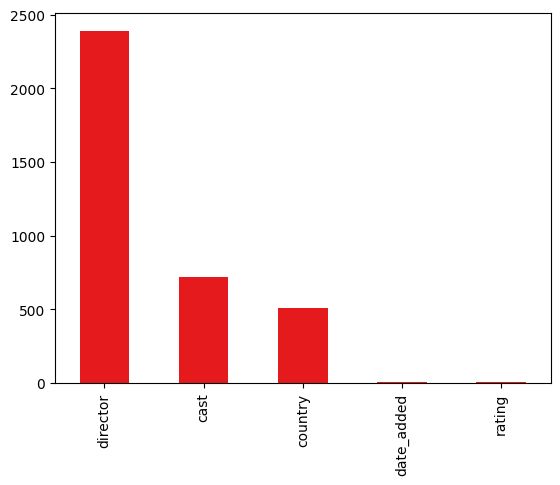

In [ ]:
# Visualizing the missing values
df.isnull().sum().sort_values(ascending=False)[:5].plot(kind='bar')
plt.show()

In [ ]:
# Dropping values for date_added
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
df.fillna('UnknowN!',inplace=True)

In [ ]:
# Are all null values taken care of?
if 0==df.isnull().sum().sum():
  print('Yes')
else:
  print('No')

Yes


## ***Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Variables Description

1. show_id: A unique identifier for each show.

2. type: The format of the show, typically classified as ‘Movie’ or ‘TV Show’.

3. title: The name of the show.

4. director: The person or group of people who directed the show.

5. cast: The actors and actresses who are part of the show.

6. country: The country where the show was produced.

7. date_added: The date when the show was added to the platform.

8. release_year: The year when the show was originally released.

9. rating: The rating given to the show, based on age suitability.

10. duration: The length of the show. For movies, it’s usually in minutes, and for TV shows, it’s usually in seasons.

11. listed_in: The genre or category of the show.

12. description: A brief summary of the show’s storyline.

#### Age Rating Guide

1. TV-MA: This rating shows that a program is intended for adults. ‘MA’ stands for ‘mature audiences’. Children aged 17 and younger should not view these programs.

2. R: Restricted movies contain adult themes. Anyone under 17 requires a guardian to get into the movie. They can contain violence, drug abuse, sexuality, profanity, nudity, or other adult themes.

3. PG-13: A PG-13 rating is a sterner warning by the Rating Board to parents to determine whether their children under age 13 should view the motion picture, as some material might not be suited for them.

4. TV-14: TV 14 means the show contains material that most parents would find unsuitable for children under the age of 14. Programs with this rating have intensely suggestive dialogue, strong coarse language, intense sexual situations or intense violence.

5. TV-PG: TV PG is a TV rating that means “Parental Guidance is recommend”. The content should be fine for children around the age of 7 and older. The show may include coarse language, some sexual content, some suggestive dialogue or moderate violence.

6. NR: If a film doesn’t fit any of the previous labels, it may wind up labeled NR or UR, which stand for “Not Rated” and “Unrated” respectively.

7. TV-G: Television Programs categorized under the TV-G rating are intended suitable for all types of audiences, including children and adults.

8. TV-Y: This program is designed to be appropriate for all children. Designed to be appropriate for children of all ages.

9. TV-Y7: Television programs categorized as TV-Y7 are intended for children aged 7 and above.

10. PG: A PG-rated motion picture should be investigated by parents before they let their younger children attend. The PG rating indicates, in the view of the Rating Board, that parents may consider some material unsuitable for their children.

11. G: A G-rated motion picture contains nothing in theme, language, nudity, sex, violence or other matters that, in the view of the Rating Board, would offend parents whose younger children view the motion picture.

12. NC-17: No one 17 and under admitted. Clearly adult. Children are not admitted.

13. TV-Y7-FV: This rating is a variant of TV-Y7, indicating that the program contains “fantasy violence” that may be more intense or combative than other TV-Y7 programs.

14. UR: This stands for “Unrated”.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7777
type               2
title           7777
director        4050
cast            6822
country          682
date_added      1565
release_year      73
rating            15
duration         216
listed_in        491
description     7759
dtype: int64

## ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Adding columns for day year and month
df["date_added"] = pd.to_datetime(df['date_added'])

# Compute day.
df['day_added'] = df['date_added'].dt.day

# Compute year.
df['year_added'] = df['date_added'].dt.year

# Compute mount.
df['month_added'] = df['date_added'].dt.month

## ***Data Vizualization***

#### Univariate Analysis

For univariate analysis we will use pie chart, barplots and histograms.

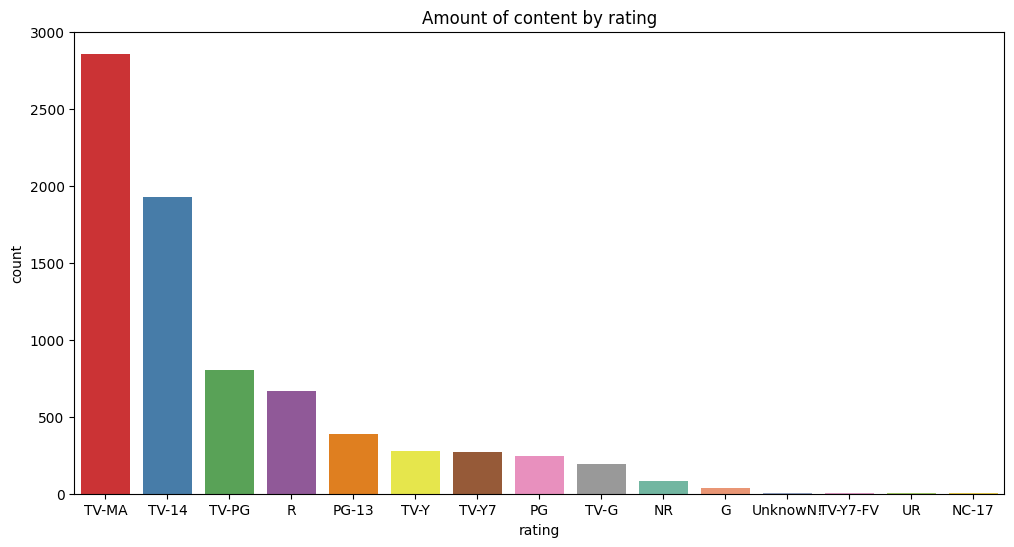

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df, order = df['rating'].value_counts().index)
plt.title('Amount of content by rating')
plt.show()

Looks like TV-MA and TV-14 are the most common age ratings.

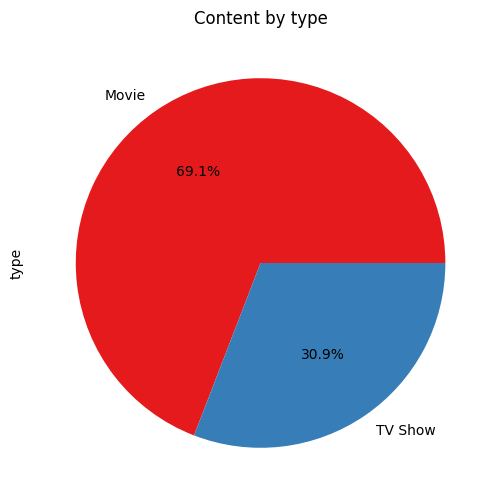

In [ ]:
plt.figure(figsize=(6,6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Content by type')
plt.show()

Most of the dataset consists of movies.

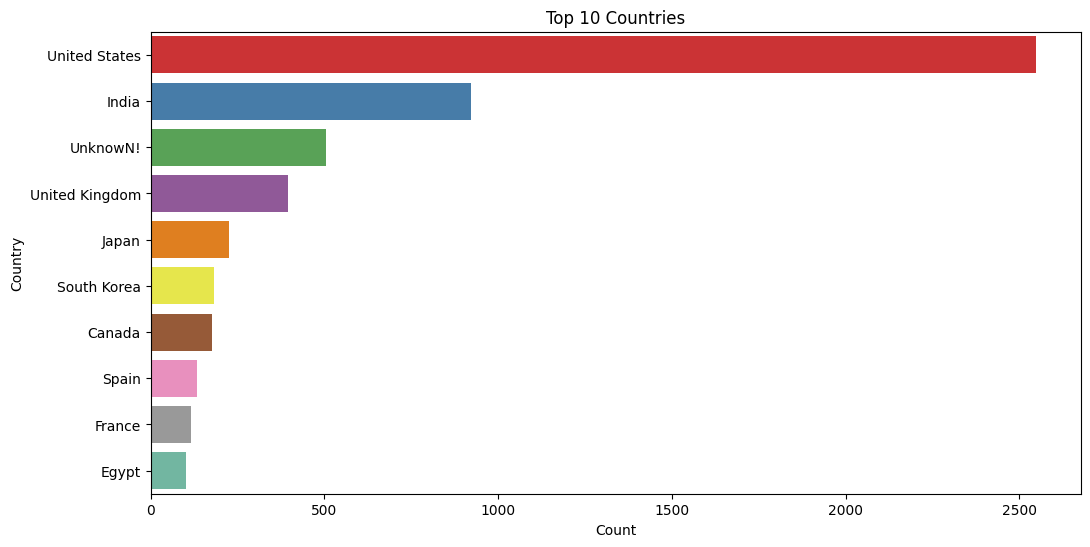

In [ ]:
# Get the top 10 countries
top_countries = df['country'].value_counts().index[:10]

# Filter the DataFrame to include only the top 10 countries
df_top_countries = df[df['country'].isin(top_countries)]

# Create the countplot
plt.figure(figsize=(12,6))
sns.countplot(y='country', data=df_top_countries, order=df_top_countries['country'].value_counts().index)
plt.title('Top 10 Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

United states and India dominate content creation.

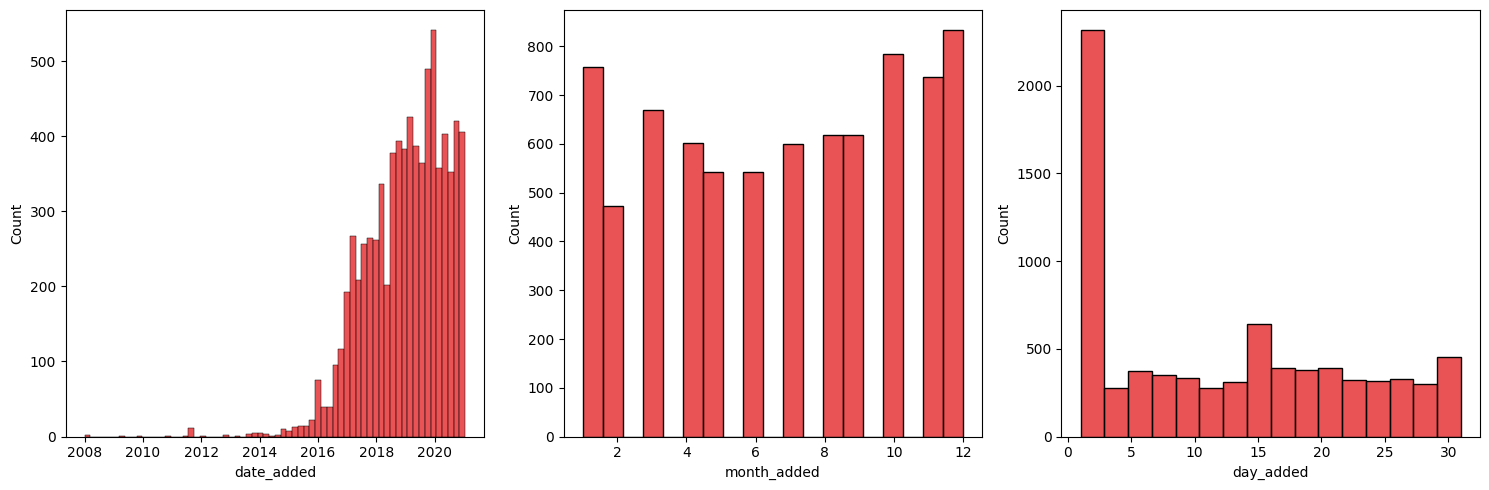

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for each column
for i, column in enumerate(['date_added', 'month_added', 'day_added']):
    sns.histplot(data=df, x=column, fill=True, ax=axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

We can observe how much content has been added post 2016. Most of the content is added at the start of the month.

#### Bivariate analysis

For bivariate analysis we will use barplot and heatmap.

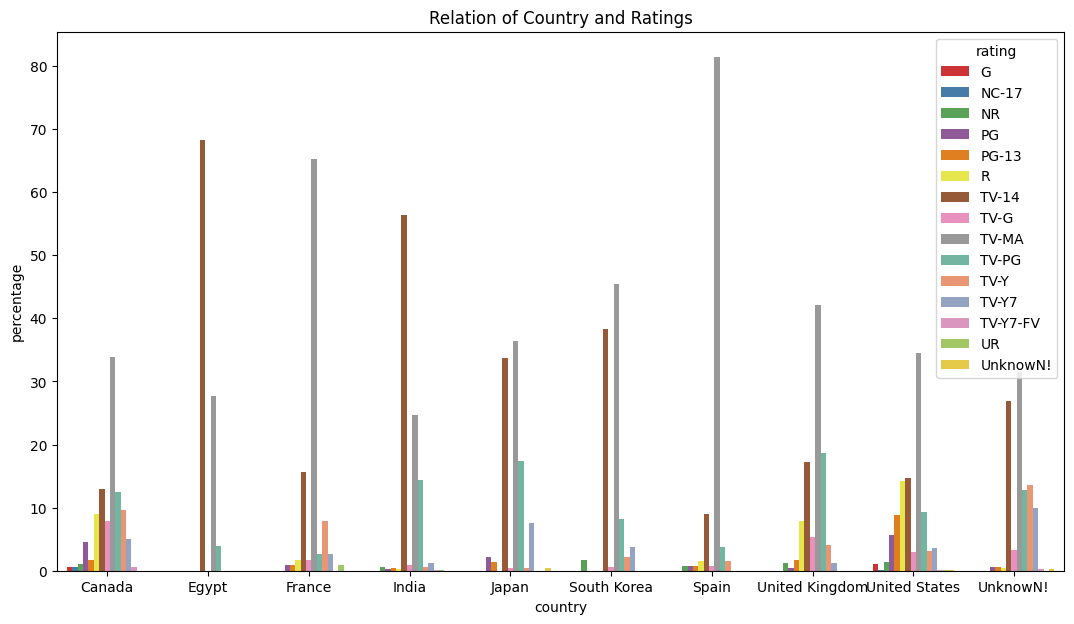

In [ ]:
normalized_counts = df_top_countries.groupby(['country', 'rating']).size().reset_index(name='count')
normalized_counts['percentage'] = normalized_counts.groupby('country')['count'].transform(lambda x: x / x.sum() * 100)

# Set the figure size
plt.figure(figsize=(13, 7))

# Create the bar plot with normalization by percentage
sns.barplot(x='country', y='percentage',hue='rating', data=normalized_counts)

# Set title
plt.title('Relation of Country and Ratings')

# Display the plot
plt.show()

OUtside of India and Egypt, TV-MA rating is the most common, as opposed to TV-14.

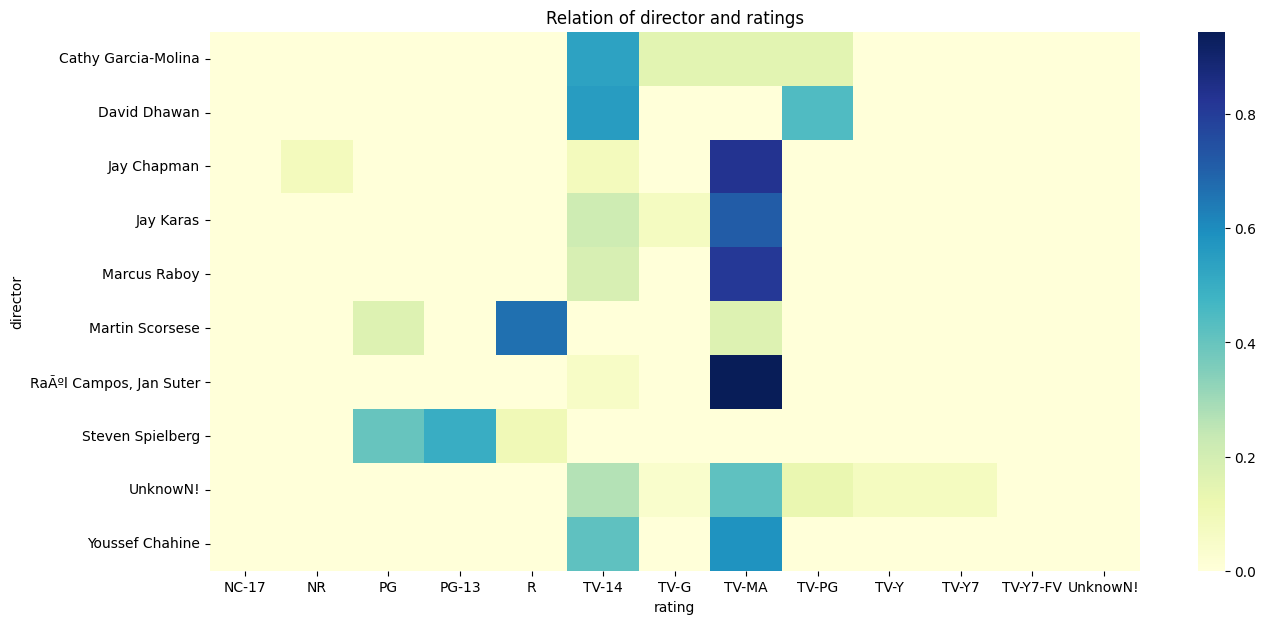

In [ ]:
# Get top 10 directors
top_directors = df['director'].value_counts().index[:10]
df_director = df[df['director'].isin(top_directors)]

# Calculate the percentage of each rating category per director
df_director = df_director.groupby(['director', 'rating']).size().unstack(fill_value=0)
df_director = df_director.div(df_director.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(15,7))
sns.heatmap(df_director, cmap='YlGnBu')
plt.title('Relation of director and ratings')

plt.show()

Most of the top directors seem to prefer to work on TV-MA movies.

### Mulivariate Analysis

Since most of our variables are text based a correlational matrix will be of no use, therefore we will make use of mutual information.

Mutual Information (MI) is a measure of the amount of information that knowing the value of one random variable gives about another.

In more technical terms, MI quantifies the discrepancy between the probability of two events occurring together and what this probability would be if the events were independent. It can take positive or negative values, but is zero if the two variables are independent.

MI is particularly useful in scenarios where the relationship between variables is non-linear or the variables are categorical.

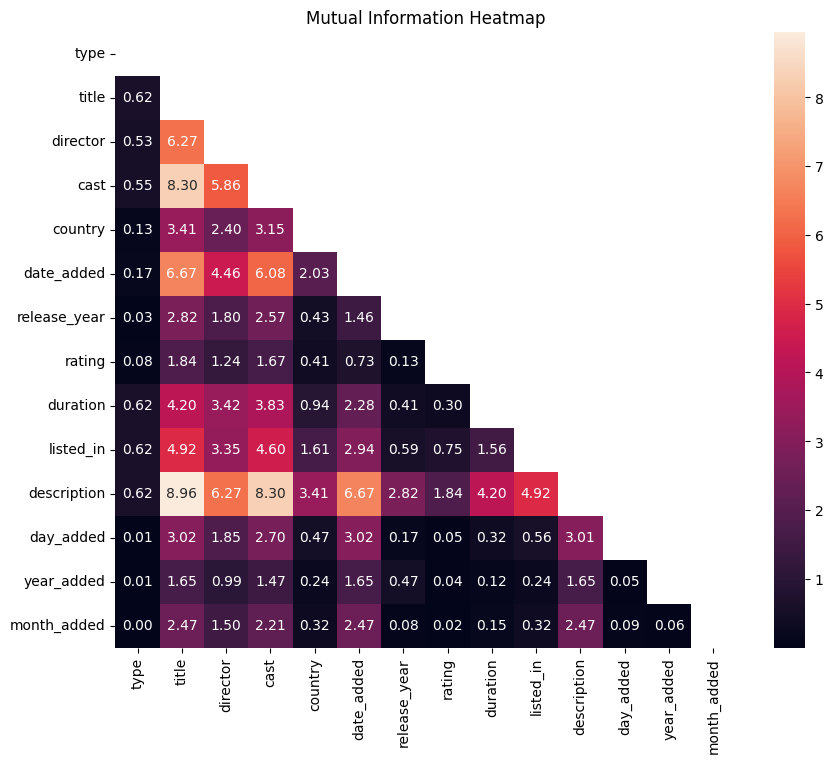

In [ ]:
# Convert categorical variables to integers
df_mi = pd.DataFrame()

for col in df.columns:
    df_mi[col] = LabelEncoder().fit_transform(df[col])

#Dropping irrelevant column
df_mi.drop('show_id',axis=1,inplace=True)

# Calculate mutual information matrix
mi_matrix = pd.DataFrame(index=df_mi.columns, columns=df_mi.columns)
for col1 in df_mi.columns:
    for col2 in df_mi.columns:
        mi_matrix.loc[col1, col2] = mutual_info_score(df_mi[col1], df_mi[col2])

# Converting ti float
mi_matrix = mi_matrix.astype(float)

# Mask to only display lower triangle
mask = np.triu(np.ones_like(mi_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mi_matrix, annot=True, mask=mask, fmt=".2f")
plt.title('Mutual Information Heatmap')
plt.show()

The only relationships of note are between:

1. cast and description.

2. title and description.

Every other value is extremly low.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H0): There is no association between rating and type.

2. Alternative Hypothesis (H1): There is an association between rating and type.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of `rating` and `type`
contingency_table = pd.crosstab(df['rating'], df['type'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat}\nP-value: {p_val}\nDegrees of freedom: {dof}')

Chi-square statistic: 930.2906603002152
P-value: 1.3924368720111648e-189
Degrees of freedom: 14


The null hypothesis is false as p-values is less trhan 0.05.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H0): The average release_year of movies is equal to that of TV shows.

2. Alternative Hypothesis (H1): The average release_year of movies is not equal to that of TV shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind

# Filter data for movies and TV shows
movies = df[df['type'] == 'Movie']['release_year']
tv_shows = df[df['type'] == 'TV Show']['release_year']

# Perform t-test
t_stat, p_val = ttest_ind(movies, tv_shows)

print(f'T-statistic: {t_stat}\nP-value: {p_val}')

T-statistic: -15.542251052237887
P-value: 1.1460629840686283e-53


As the p-value is less than 0.05,we reject the null hypothesis. This shows there is some different variations between release years of TV shows and movies.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H0): There is no association between month_added and type.

3. Alternative Hypothesis (H1): There is an association between month_added and type.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of `month_added` and `type`
contingency_table = pd.crosstab(df['month_added'], df['type'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat}\nP-value: {p_val}\nDegrees of freedom: {dof}')

Chi-square statistic: 16.242276102388054
P-value: 0.13237212804123513
Degrees of freedom: 11


As the p-value is greater than 0.05 we cannot reject the null hypothesis.

## ***Feature Engineering & Data Pre-processing***

### Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
count = df.astype(str).apply(lambda x: x.str.contains('UnknowN!')).sum().sum()

print(f"'unknown' appears {count} times in the DataFrame.")

'unknown' appears 3610 times in the DataFrame.


In [ ]:
# Replace 'unknown' with ' ' in the DataFrame
df = df.replace('UnknowN!', ' ')

In [ ]:
#Checking again
count = df.astype(str).apply(lambda x: x.str.contains('UnknowN!')).sum().sum()

print(f"'unknown' appears {count} times in the DataFrame.")

'unknown' appears 0 times in the DataFrame.


### Textual Data Preprocessing


Here’s how we would perform the steps involved in the Bag of Words model:

1. Text Preprocessing: Firstly, we will preprocess the text data. This involves converting all the text to lower case to ensure uniformity. We will also remove non-word characters and punctuations to reduce noise in the data.

2. Tokenization Next: we will break down each sentence into its constituent words, a process known as tokenization. This step will convert the text data into a set of words, which will be easier to analyze.

3. Count Frequencies: Following tokenization, we will create a dictionary where the keys are the words, and the values are the frequencies of these words in the text. This will give us a clear understanding of the distribution of words in our text data.

4. Create a Vector Finally: we will create a vector for each document in our dataset. Each dimension of this vector corresponds to a word from our dictionary, and the value at each dimension is the frequency of that word in the document. This will result in a numerical representation of our text data, which can be used for further analysis.



In [ ]:
# Expand Contraction
df['Words']=df['title'] + ' '+ df['director'] + ' '+ df['cast'] + ' '+ df['title'] + ' '+ df['description'] + ' '+ df['listed_in']

In [ ]:
#Importing lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Importing stop words
stop_words = set(stopwords.words('english'))

*Note*: Along with the usual stopwords I have excluded some generic words from this dataset.

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove specific words
    tokens = [token for token in tokens if token not in ['tv', 'movies','s','show',"'s",'international','movie','new','``']]

    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text

In [ ]:
df['pro_words']=df['Words'].apply(preprocess_text)

Function to find  generic words to exclude, along with stopwords.

In [ ]:
def get_most_common_words(df, text_column, num_words=10):
    """
    Get the most common words in a DataFrame column with text data.

    Parameters:
    - df: DataFrame
    - text_column: str
        The name of the column containing text data.
    - num_words: int, optional
        The number of most common words to retrieve. Default is 10.

    Returns:
    - list
        A list of tuples containing the most common words and their counts.
    """
    # Ensure the column is of string type
    df[text_column] = df[text_column].astype(str)

    # Tokenize the text into words
    nltk.download('punkt')
    df['tokens'] = df[text_column].apply(lambda x: word_tokenize(x.lower()))


    # Flatten the list of tokens
    all_tokens = [token for sublist in df['tokens'] for token in sublist]

    # Count the occurrences of each word
    word_counts = Counter(all_tokens)

    # Get the most common words
    most_common_words = word_counts.most_common(num_words)

    return most_common_words

# Example usage:
# Replace 'your_dataframe' and 'your_text_column_name' with your actual DataFrame and column name
# Replace 10 with the desired number of top words
result = get_most_common_words(df, 'pro_words', num_words=20)
print("Most common words:", result)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common words: [('drama', 2934), ('comedy', 2562), ('family', 1204), ('documentary', 1119), ('life', 1104), ('adventure', 1101), ('romantic', 923), ('action', 917), ('love', 810), ('young', 739), ('michael', 714), ('child', 708), ('independent', 683), ('john', 651), ('crime', 642), ('david', 633), ('world', 630), ('man', 630), ('woman', 626), ('friend', 602)]


### Creating a 'Bag of words'

TF-IDF, short for Term Frequency-Inverse Document Frequency, is a statistical measure in information retrieval and natural language processing. It quantifies the importance of a word in a document relative to a collection of documents. The TF-IDF score is calculated by multiplying two metrics: Term Frequency (TF), which is the frequency of a word in a document, and Inverse Document Frequency (IDF), which measures the rarity of the word across all documents.

In [ ]:
# Count vectorizer
vectorizer = TfidfVectorizer()

We will divide the dataset into movie and tv show.

In [ ]:
# Movie dataset
movie_df=df[df['type']=='Movie']

In [ ]:
# Tv show dataset
tv_df=df[df['type']=='TV Show']

In [ ]:
# Applying TFIDF on both datasets
X_movie=vectorizer.fit_transform(movie_df['pro_words'])
X_tv=vectorizer.fit_transform(tv_df['pro_words'])

In [ ]:
# Convert the matrix to an array and create a DataFrame
df_vectors_movie = pd.DataFrame(X_movie.toarray())
df_vectors_tv = pd.DataFrame(X_tv.toarray())

In [ ]:
# Initiating standard scaler
scaler = StandardScaler()

In [ ]:
# Scaling values so they fit our model better
scaler.fit_transform(df_vectors_movie)
scaler.fit_transform(df_vectors_tv)

array([[-0.09094673, -0.02876392, -0.02041667, ..., -0.02041667,
        -0.02041667, -0.02041667],
       [-0.09094673, -0.02876392, -0.02041667, ..., -0.02041667,
        -0.02041667, -0.02041667],
       [-0.09094673, -0.02876392, -0.02041667, ..., -0.02041667,
        -0.02041667, -0.02041667],
       ...,
       [-0.09094673, -0.02876392, -0.02041667, ..., -0.02041667,
        -0.02041667, -0.02041667],
       [-0.09094673, -0.02876392, -0.02041667, ..., -0.02041667,
        -0.02041667, -0.02041667],
       [ 8.01789362, -0.02876392, -0.02041667, ..., -0.02041667,
        -0.02041667, -0.02041667]])

TruncatedSVD is a dimensionality reduction technique that performs linear dimensionality reduction by means of truncated singular value decomposition (SVD)1. In particular, TruncatedSVD works well on term count/tf-idf matrices as returned by the vectorizers in text analysis.

In [ ]:
#Reducing sparse matrix using svd
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
df_vectors_reduced_movie = svd.fit_transform(df_vectors_movie)

df_vectors_reduced_tv = svd.fit_transform(df_vectors_tv)

### Analysis using dendogram and elbow plot

We need to find appropriate hyperparameter for K-means.

PCA: Principal Component Analysis (PCA) reduces the dimensionality of data by identifying the axes that capture the maximum variance.

Clustering: After PCA, a clustering algorithm groups similar data points together.

Dendrogram: A dendrogram visualizes the results of hierarchical clustering, showing the hierarchical relationship between clusters.

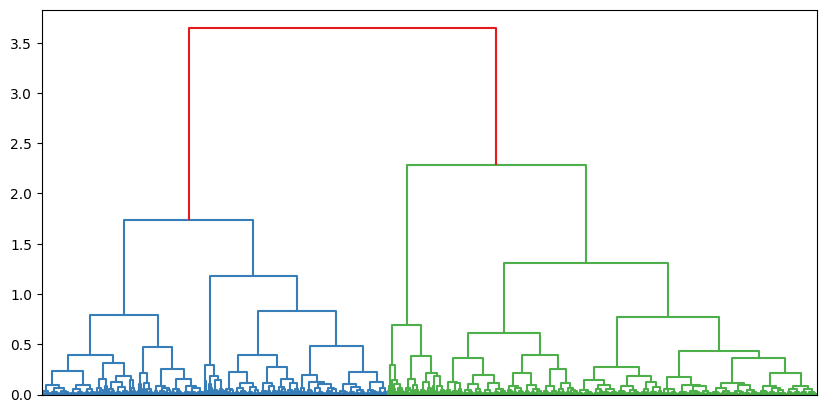

In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=0.95)
df_vectors_pca_movie = pca.fit_transform(df_vectors_reduced_movie)

# Calculate the linkage matrix
Z = linkage(df_vectors_pca_movie, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

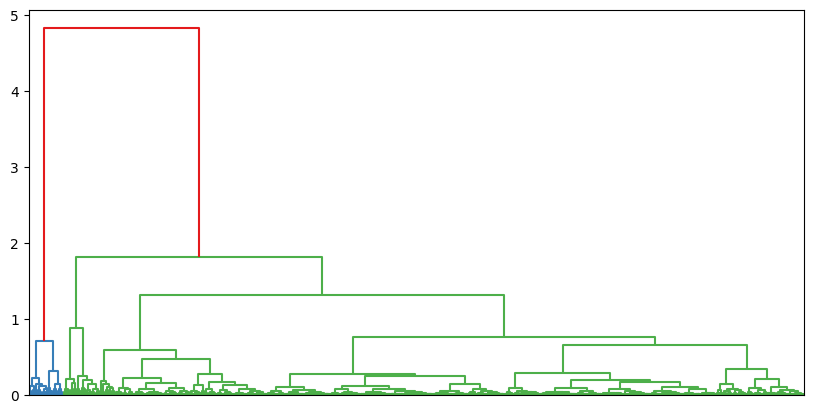

In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=0.95)
df_vectors_pca_tv = pca.fit_transform(df_vectors_reduced_tv)

# Calculate the linkage matrix
Z = linkage(df_vectors_pca_tv, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

It is difficult to decide our k value just by looking at these graphs, we will use other methods for the same.

The Elbow Method is a technique used to determine the optimal number of clusters (k) in the K-Means clustering algorithm1. Here’s a brief explanation:

Iteration: We iterate for k=1 to k=n, where n is a hyperparameter that we choose.

1. WCSS Calculation: For each value of k, we calculate the Within-Cluster Sum of Squares (WCSS), which is the sum of the squared distances between each point and the centroid in a cluster.

2. Elbow Plot: We plot a graph of k versus their WCSS value. The graph looks like an elbow.

3. Optimal k: We choose the value of k from where the graph starts to look like a straight line1. This is considered the optimal number of clusters.

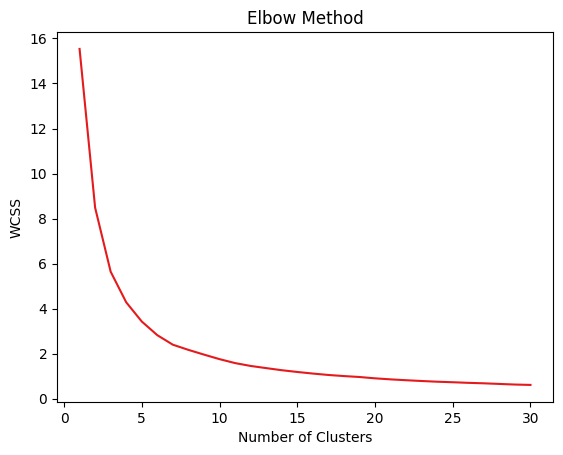

In [ ]:
# calculate the within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_vectors_pca_movie)
    wcss.append(kmeans.inertia_)

# plot the within-cluster sum of squares as a function of k
plt.plot(range(1, 31), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

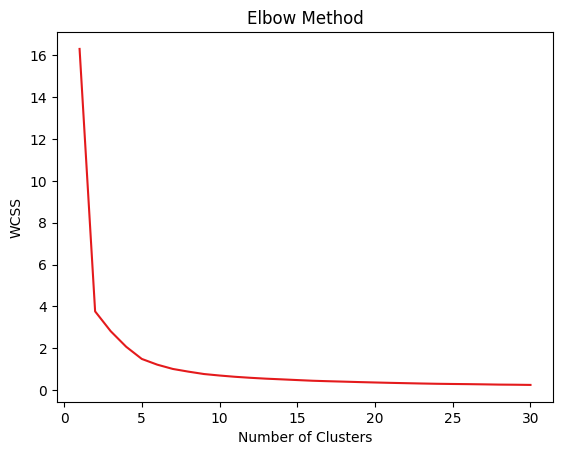

In [ ]:
# calculate the within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_vectors_pca_tv)
    wcss.append(kmeans.inertia_)

# plot the within-cluster sum of squares as a function of k
plt.plot(range(1, 31), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Intstead of choosing a single values we will test a range between 3 and 13 using a more precise method.

### Silhouette Score and Kmeans clustering

In [ ]:
# the range we have selected to use
range_n_clusters = range(3, 13)

The Silhouette Score is a measure used to evaluate the quality of clusters in data clustering. It quantifies how well a data point fits into its assigned cluster and how distinct it is from other clusters. The score is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample.

The score ranges from 0 to 1, where higher is better.

In [ ]:
#Calculating sillhouette score for each k value for movies dataset
silhouette_scores_movie = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_vectors_pca_movie)
    silhouette_avg = silhouette_score(df_vectors_pca_movie, cluster_labels)
    silhouette_scores_movie.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
#Calculating sillhouette score for each k value for tv dataset
silhouette_scores_tv = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_vectors_pca_tv)
    silhouette_avg = silhouette_score(df_vectors_pca_tv, cluster_labels)
    silhouette_scores_tv.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

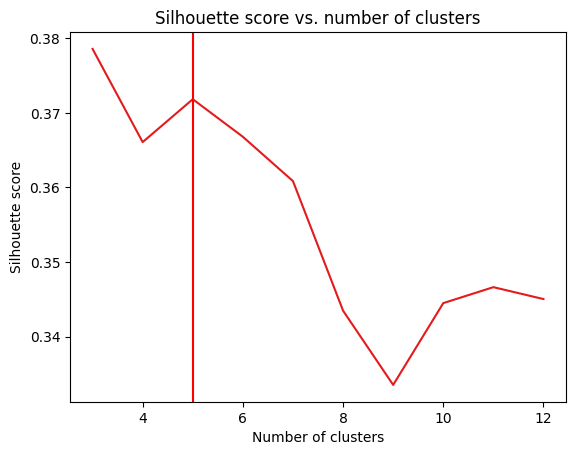

In [ ]:
# Silhouette score plot for movies
plt.plot(range_n_clusters, silhouette_scores_movie)
plt.title("Silhouette score vs. number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.axvline(5,color='red')
plt.show()

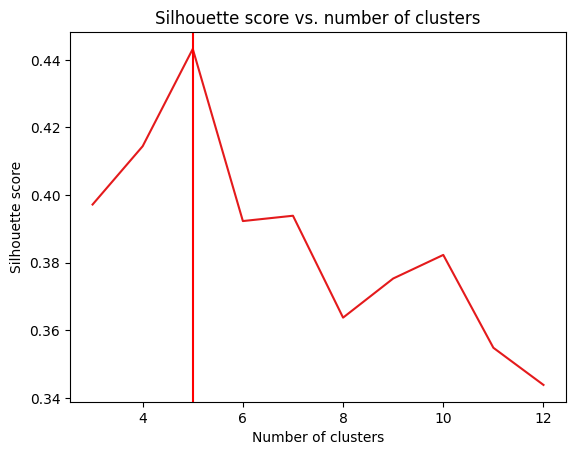

In [ ]:
# Silhouette score plot for tv
plt.plot(range_n_clusters, silhouette_scores_tv)
plt.title("Silhouette score vs. number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.axvline(5,color='red')
plt.show()

Any value less than 3 would not be uselfull for clustering. Therefore 5 is the best values acccording to our requirements and the silhouette score.

Mini Batch K-means is a variation of the traditional K-means clustering algorithm designed to handle large datasets. Instead of using the entire dataset in each iteration, it uses small random batches of data. This approach allows the algorithm to converge faster and use less memory than traditional K-means1. The process involves initializing cluster centroids, selecting a mini-batch of data, assigning each data point in the mini-batch to the closest cluster centroid, and updating the cluster centroids based on the data points assigned to them. This process is repeated until convergence or a maximum number of iterations is reached.

In [ ]:
# Fitting Minikmeans on tv dataset
n_clusters = 5
batch_size = 1000
kmeans_tv = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=42)
kmeans_tv.fit(df_vectors_pca_tv)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=1000, n_clusters=5, random_state=42)

In [ ]:
# Making a column for cluster number for TV dataset
tv_df.loc[:,'Cl_no'] = kmeans_tv.labels_

<ipython-input-1232-48d73be9101f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df.loc[:,'Cl_no'] = kmeans_tv.labels_


In [ ]:
#Fitting Minikmeans on movies dataset
n_clusters = 5
batch_size = 1000
kmeans_movie = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=42)
kmeans_movie.fit(df_vectors_pca_movie)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=1000, n_clusters=5, random_state=42)

In [ ]:
# Making a column for cluster number
movie_df.loc[:,'Cl_no'] = kmeans_movie.labels_

<ipython-input-1235-eaa7d96d6e6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.loc[:,'Cl_no'] = kmeans_movie.labels_


Now we will generate some wordclouds for our clusters.

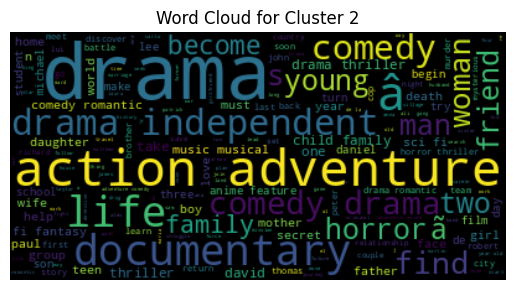

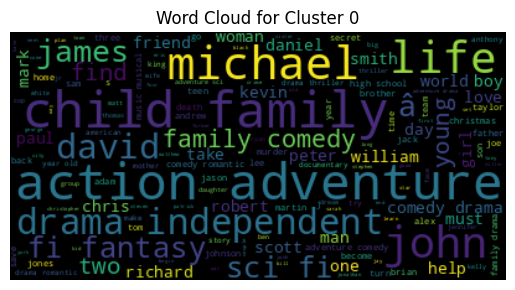

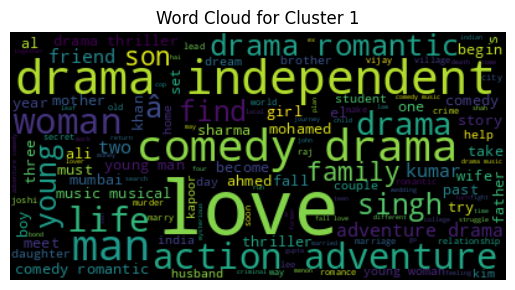

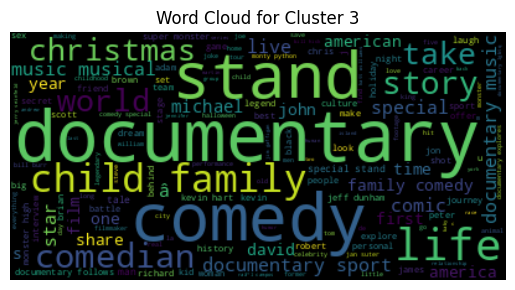

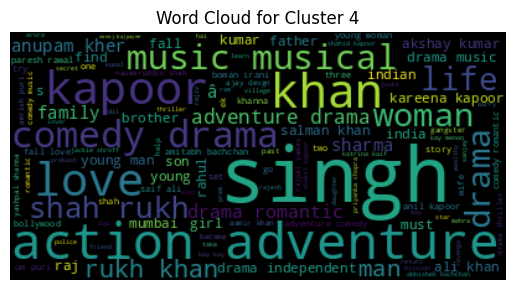

In [ ]:
# Get unique cluster numbers
clusters = movie_df['Cl_no'].unique()

# Generate a word cloud for each cluster
for cluster in clusters:
    # Filter data for the current cluster
    cluster_data = movie_df[movie_df['Cl_no'] == cluster]['pro_words']

    # Join all the 'pro_words' in the cluster into a single string
    text = ' '.join(cluster_data)

    # Generate the word cloud
    wordcloud = WordCloud().generate(text)

    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

1. Cluster0: Family movies.

2. Cluster1: Romantic comedies.

3. Cluster2: Action adventure.

4. Cluster3: Comedy.

5. Cluster4: Bollywood.

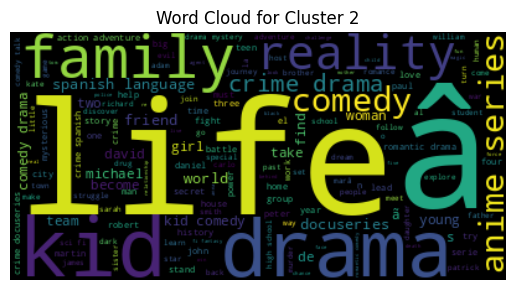

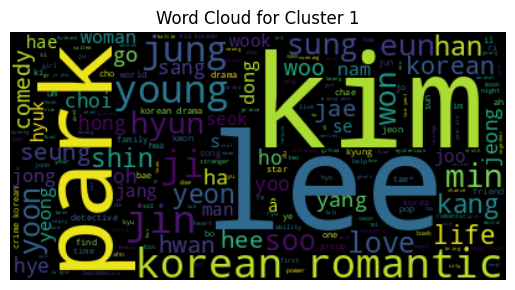

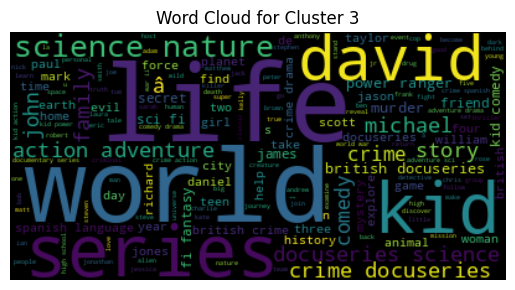

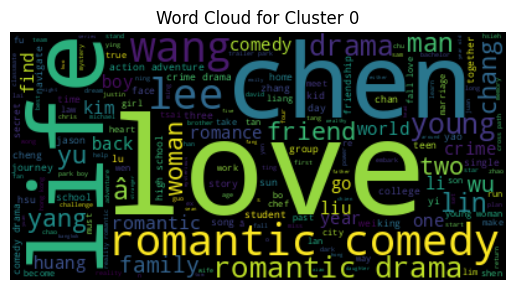

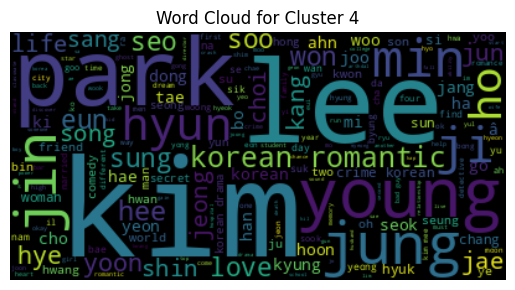

In [ ]:
# Get unique cluster numbers
clusters = tv_df['Cl_no'].unique()

# Generate a word cloud for each cluster
for cluster in clusters:
    # Filter data for the current cluster
    cluster_data = tv_df[tv_df['Cl_no'] == cluster]['pro_words']

    # Join all the 'pro_words' in the cluster into a single string
    text = ' '.join(cluster_data)

    # Generate the word cloud
    wordcloud = WordCloud().generate(text)

    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

1. Cluster0: Romantic comedies.

2. Cluster1: Korean tv shows.

3. Cluster2: Reality tv.

4. Cluster3: Documentary series.

5. Cluster4: Korean tv shows.

For tv, cluster0 and cluster4 are most likely part of a bigger korean cluster, with different actors.

We will test this hypothesis shortly.

### TSNE Plot

A t-SNE (t-Distributed Stochastic Neighbor Embedding) plot is a visualization tool for high-dimensional data. It reduces the dimensionality of the data to 2 or 3 dimensions, making it possible to visualize. The t-SNE algorithm calculates the similarity between data points in the high-dimensional space and then maps these points onto a lower-dimensional space while preserving these similarities. In the resulting t-SNE plot, similar data points are represented close together and dissimilar data points are represented far apart. This allows us to understand more about underlying patterns and relationships in the data.

In [ ]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
transformed_data = tsne_model.fit_transform(df_vectors_pca_tv)


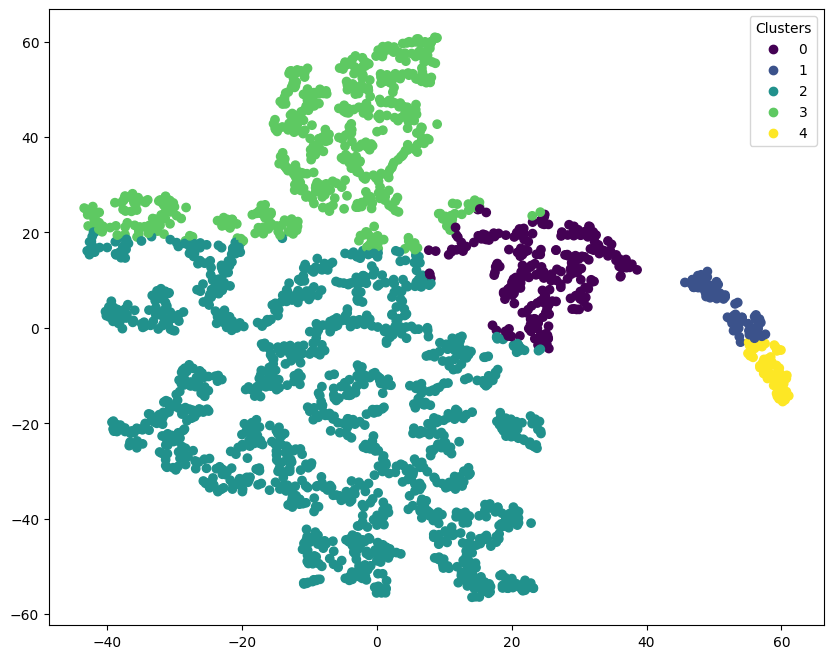

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=kmeans_tv.labels_, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

As expected Cluster1 and cluster4 are part of a bigger korean cluster. This show limitations of silhouette scoring.

In [ ]:
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
transformed_data = tsne_model.fit_transform(df_vectors_pca_movie)


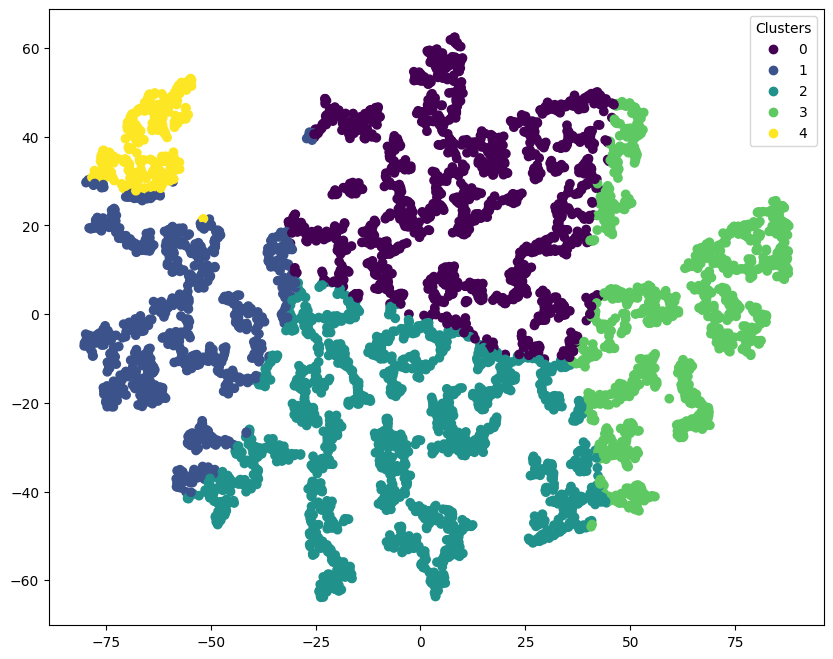

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=kmeans_movie.labels_, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

The movies dataset is largely cleanly divided, but some improvements can be made.

# **Conclusion**

The project provides a comprehensive analysis of the Netflix dataset using various Natural Language Processing (NLP) and Machine Learning (ML) techniques. The methodology involved understanding the dataset, preprocessing and feature extraction, dimensionality reduction, clustering, visualization, and interpretation.

The clusters formed provided valuable insights into the content available on Netflix, such as the prevalence of genres like family movies, romantic comedies, action adventures, and comedies in the movie dataset, and romantic comedies, Korean TV shows, reality TV, documentary series in the TV shows dataset. However, there were limitations observed in silhouette scoring, as Cluster1 and Cluster4 were part of a larger Korean cluster.

The tsne plots for both movies and TV shows datasets indicated a reasonable structure has been found. Although the datasets were largely cleanly divided, there is room for improvement.

In conclusion, this project has demonstrated the potential of NLP and ML in analyzing and deriving insights from large datasets. The insights could be used for making recommendations, understanding viewer preferences, and more. Future work could focus on improving the clustering and exploring other features that could provide additional insights.